In [27]:
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
series = pd.read_csv('data.csv', header=None, squeeze=True)
print(series)

            0         1         2         3         4         5         6   \
0     2.230745 -1.304342  0.503232  0.165603 -0.100234 -0.288019 -0.453622   
1     2.428688 -0.952002  0.554064  0.304153 -0.034765 -0.302915 -0.405218   
2     2.667264 -0.957032  0.421356  0.358719 -0.093101 -0.299509 -0.385836   
3     2.635295 -0.990234  0.408294  0.331916 -0.072920 -0.311226 -0.397238   
4     2.682590 -1.116654  0.545907  0.285901 -0.034637 -0.310793 -0.465673   
...        ...       ...       ...       ...       ...       ...       ...   
6335  1.806655 -0.497029  0.541596  0.089443  0.215478  0.376780  0.219336   
6336  1.729724 -0.527134  0.469173  0.110029  0.385939  0.319691  0.218577   
6337  1.643652 -0.430085  0.423685  0.106435  0.375203  0.301122  0.317436   
6338  1.508531 -0.541294  0.419480  0.138350  0.265466  0.411930  0.337074   
6339  1.393011 -0.608468  0.507354  0.128174  0.296507  0.401421  0.253698   

            7         8         9         10        11  
0    -

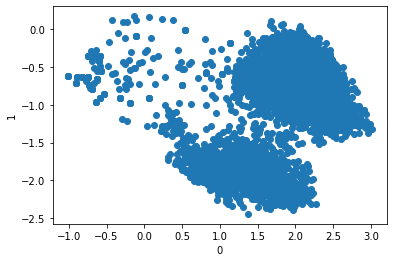

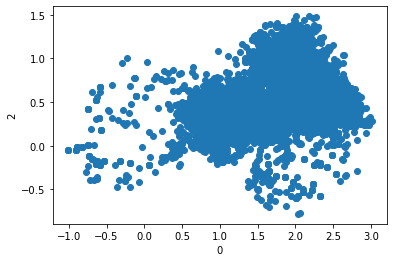

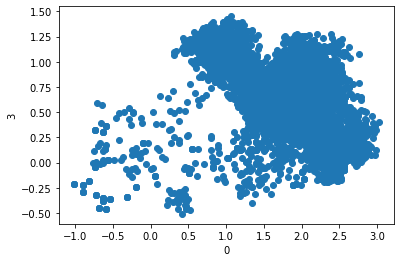

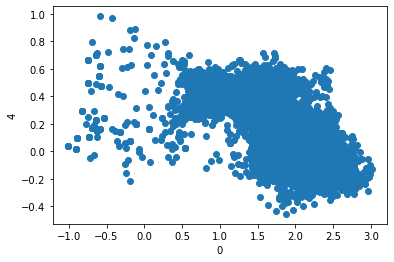

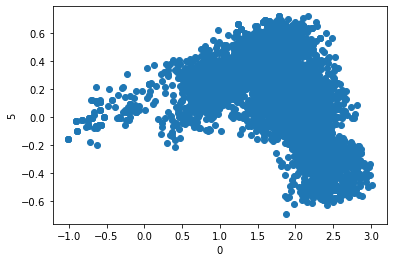

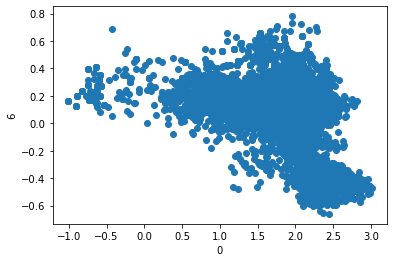

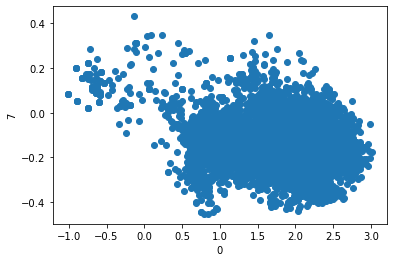

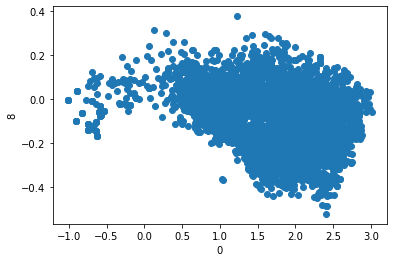

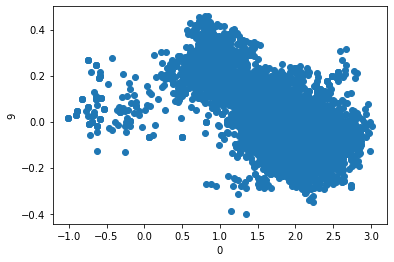

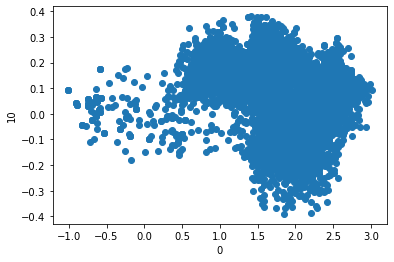

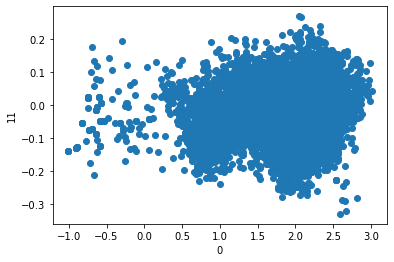

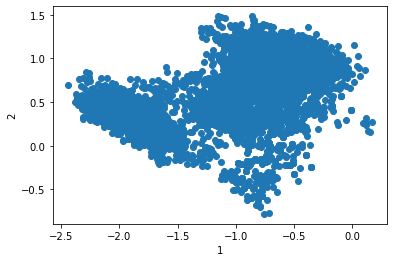

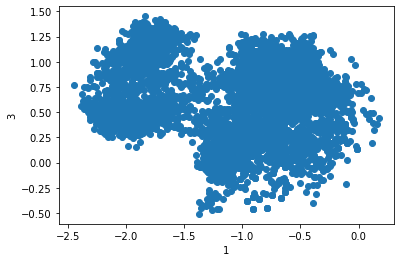

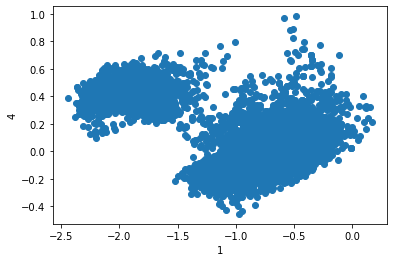

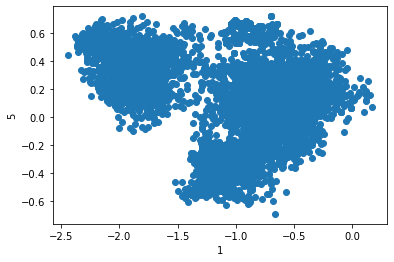

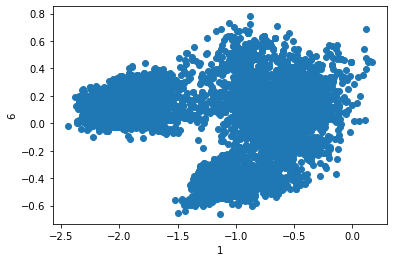

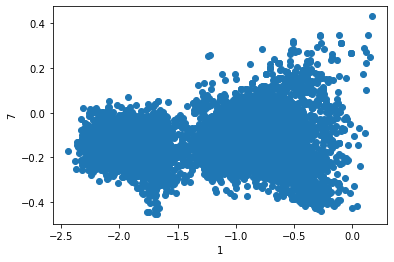

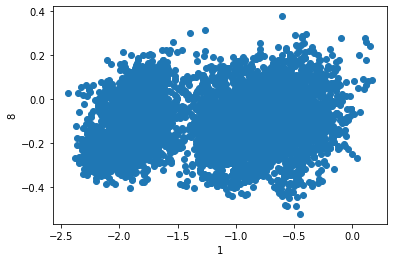

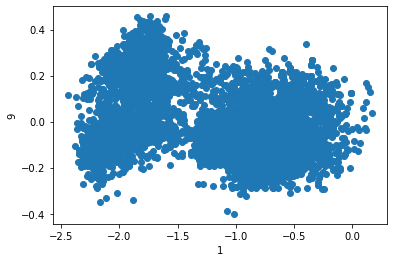

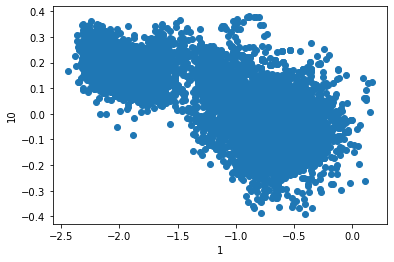

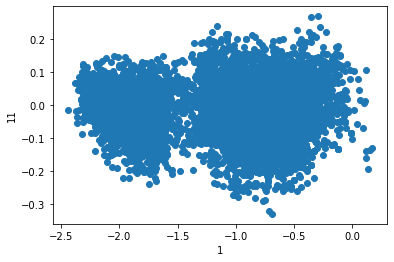

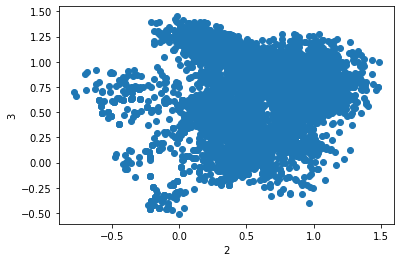

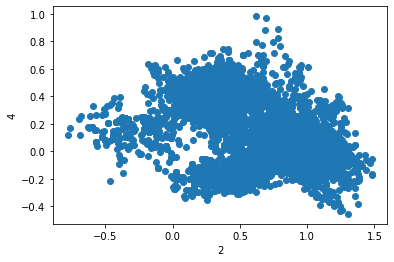

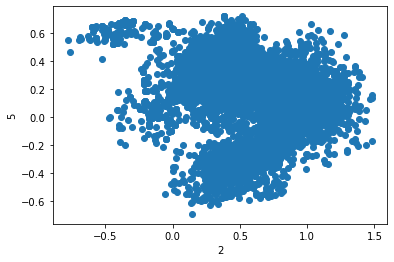

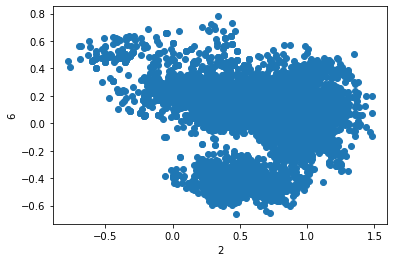

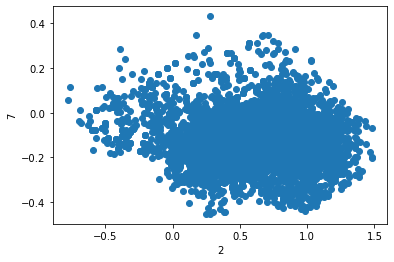

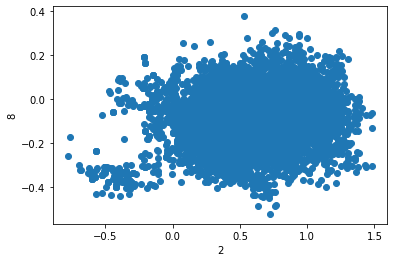

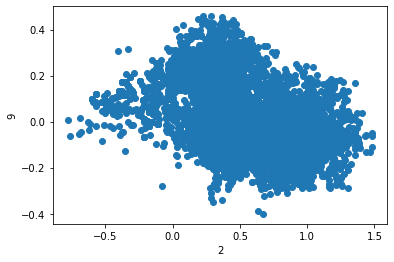

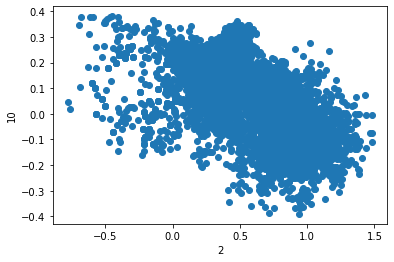

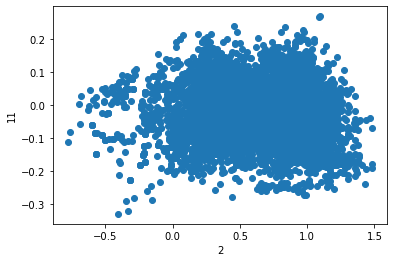

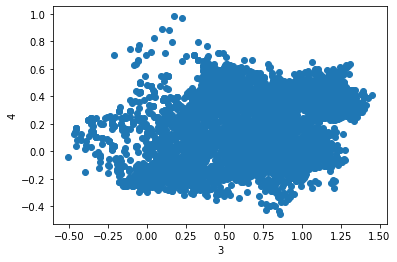

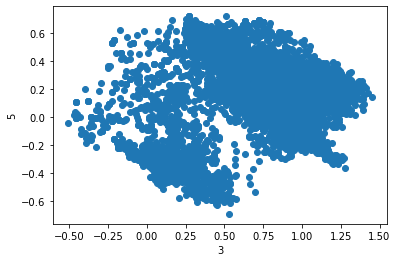

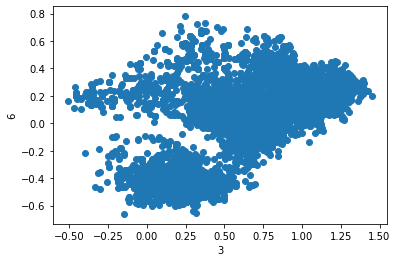

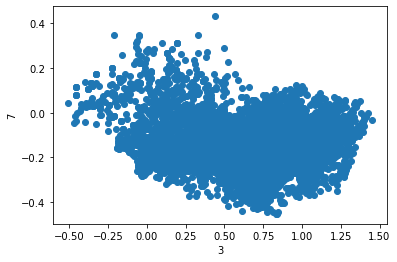

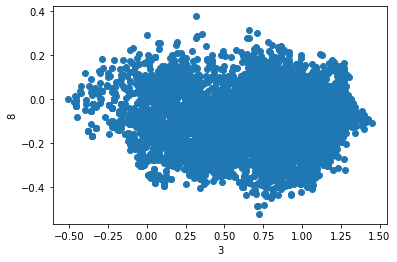

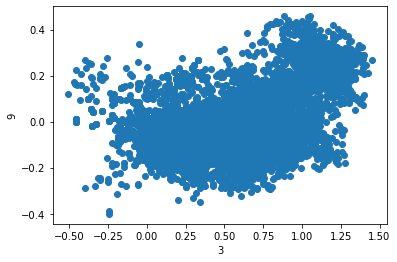

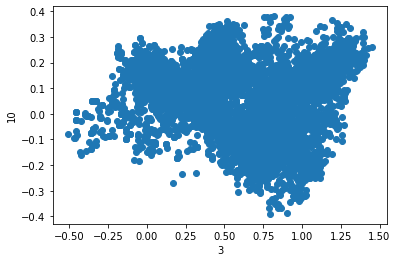

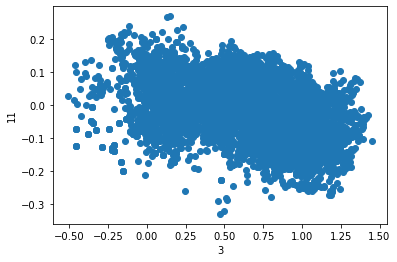

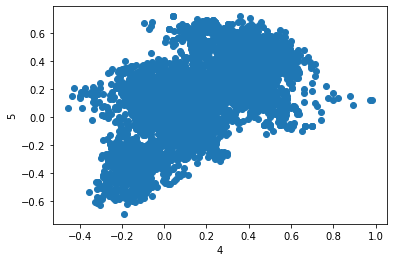

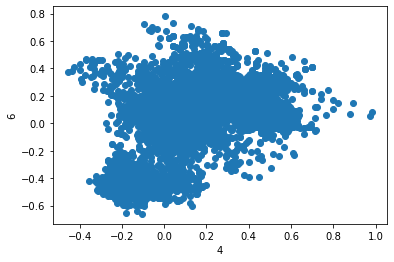

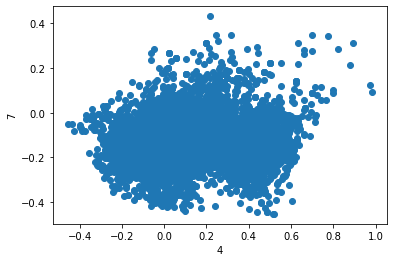

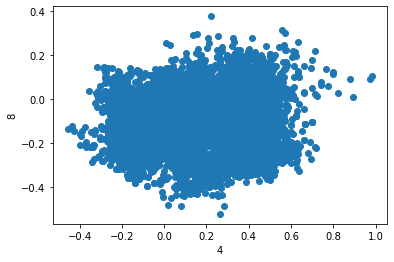

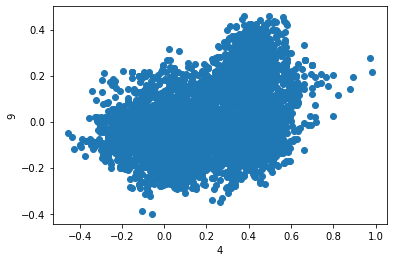

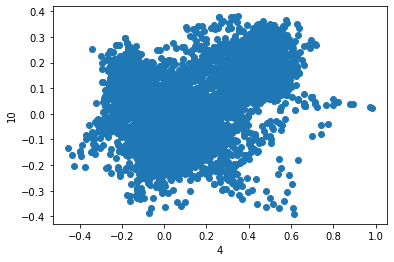

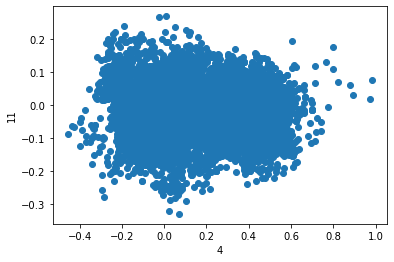

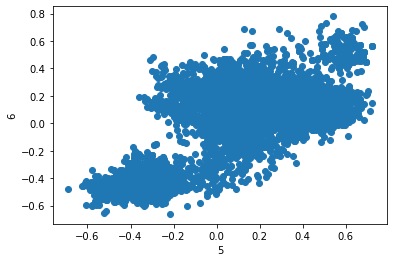

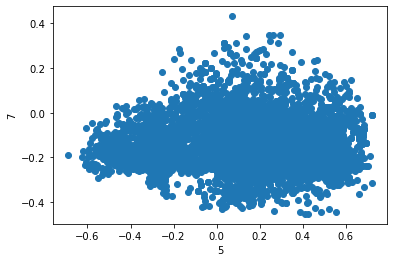

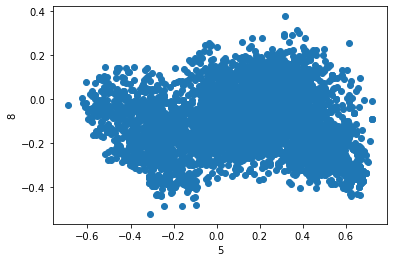

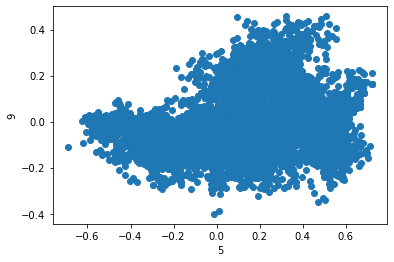

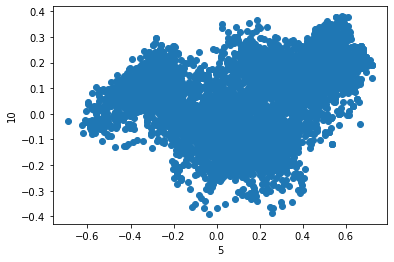

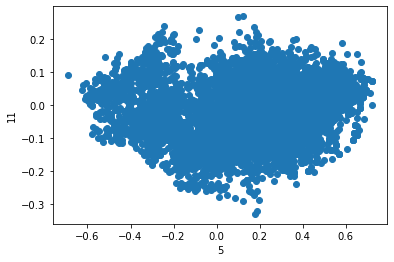

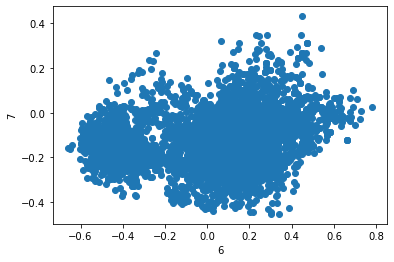

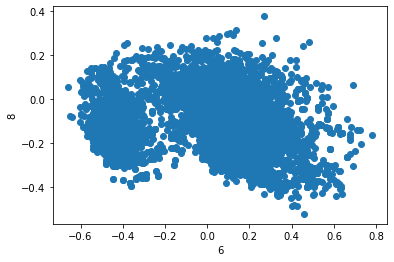

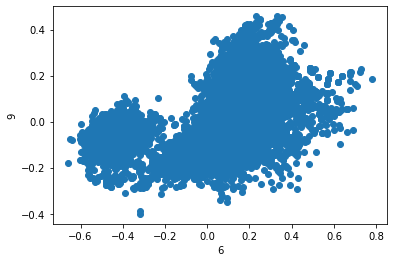

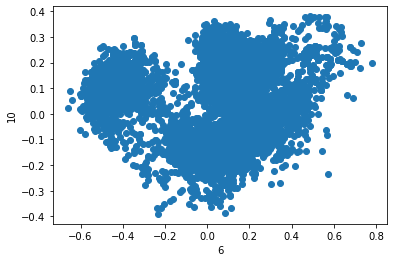

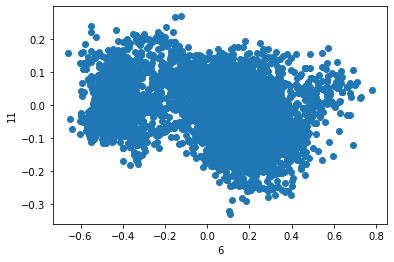

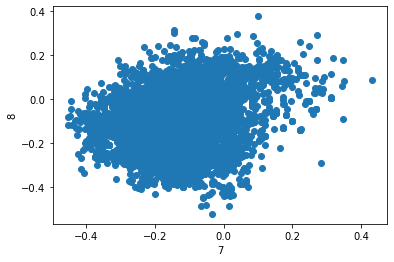

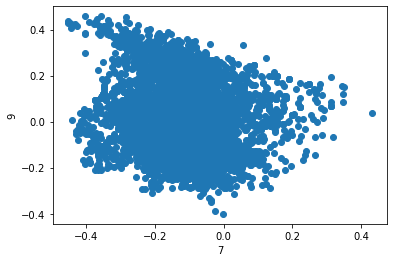

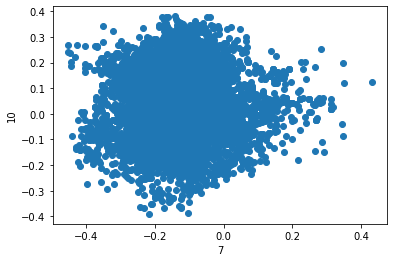

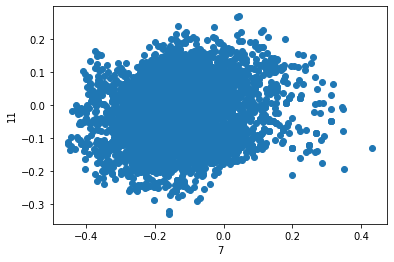

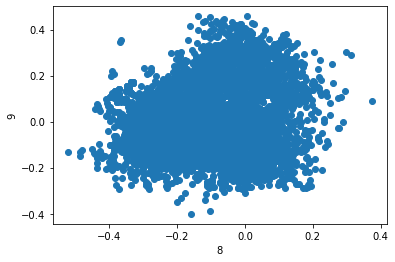

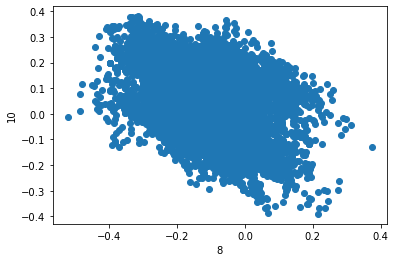

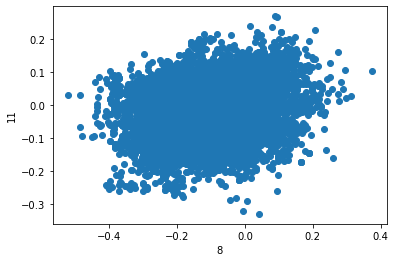

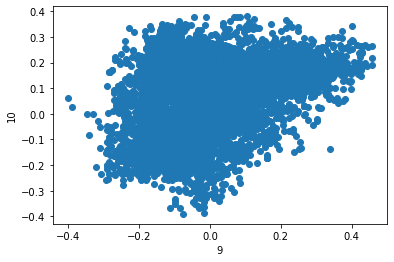

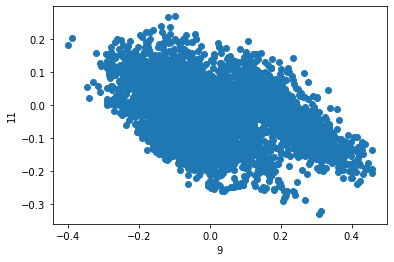

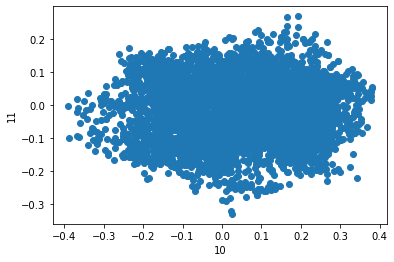

In [29]:
columns = list(series.columns)

# loop through all possible combinations of columns
for i in range(len(columns)):
    for j in range(i+1, len(columns)):
        # create a scatter plot of the two columns
        plt.scatter(series.iloc[:,i], series.iloc[:,j])
        plt.xlabel(columns[i])
        plt.ylabel(columns[j])
        plt.show()

In [31]:
series2 = pd.read_csv('outputLBG.txt', header=None, squeeze=True)

In [32]:
print(series2)

0       0
1       0
2       0
3       0
4       0
       ..
6335    2
6336    2
6337    2
6338    2
6339    2
Name: 0, Length: 6340, dtype: int64


In [33]:
series[12] = series2

In [34]:
series

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,2.230745,-1.304342,0.503232,0.165603,-0.100234,-0.288019,-0.453622,-0.025707,0.043087,-0.097460,0.108839,0.084576,0
1,2.428688,-0.952002,0.554064,0.304153,-0.034765,-0.302915,-0.405218,-0.032207,0.029055,-0.084075,0.080556,0.099330,0
2,2.667264,-0.957032,0.421356,0.358719,-0.093101,-0.299509,-0.385836,-0.177004,0.001559,-0.007540,0.044908,0.058043,0
3,2.635295,-0.990234,0.408294,0.331916,-0.072920,-0.311226,-0.397238,-0.129178,0.007326,-0.019113,0.088331,0.063110,0
4,2.682590,-1.116654,0.545907,0.285901,-0.034637,-0.310793,-0.465673,-0.047274,0.008257,-0.103011,0.097905,0.038077,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6335,1.806655,-0.497029,0.541596,0.089443,0.215478,0.376780,0.219336,0.040030,0.063518,0.034971,0.016732,0.092003,2
6336,1.729724,-0.527134,0.469173,0.110029,0.385939,0.319691,0.218577,0.047942,0.110817,0.106680,-0.035380,0.100449,2
6337,1.643652,-0.430085,0.423685,0.106435,0.375203,0.301122,0.317436,0.062269,0.099391,0.089903,-0.038024,0.129978,2
6338,1.508531,-0.541294,0.419480,0.138350,0.265466,0.411930,0.337074,0.020030,0.055150,0.130528,0.037143,0.043048,2


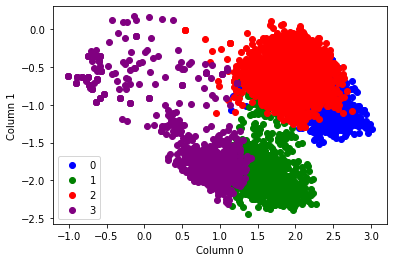

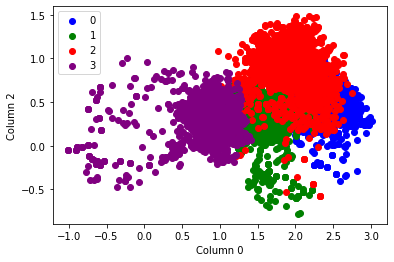

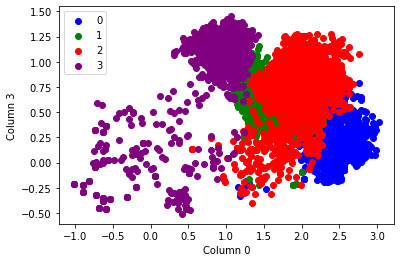

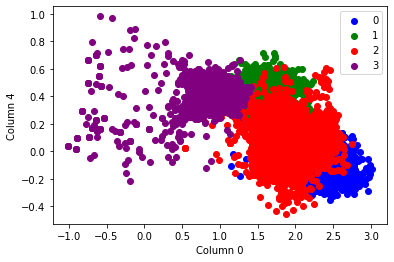

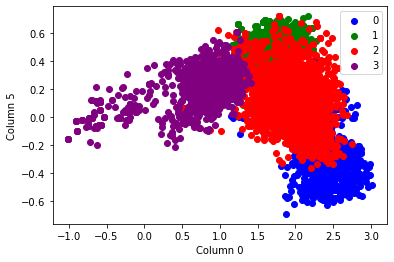

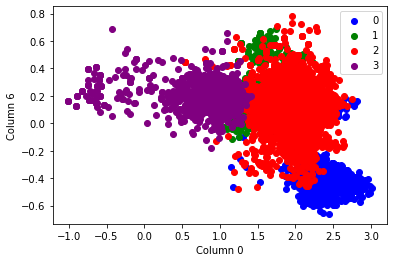

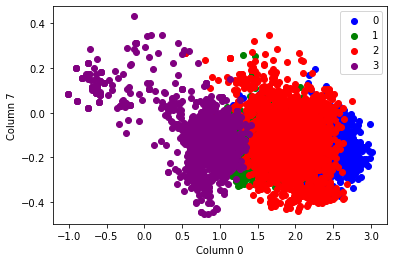

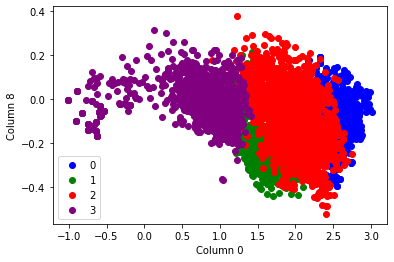

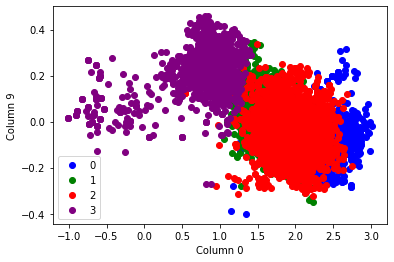

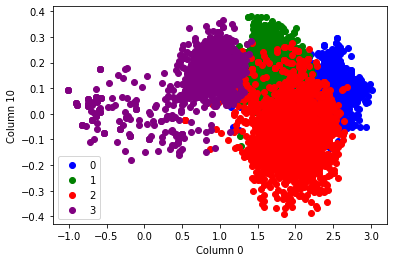

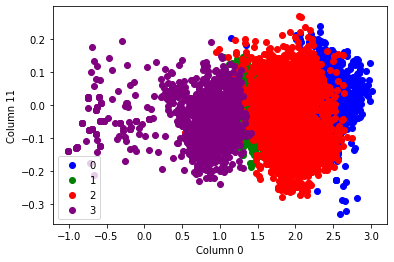

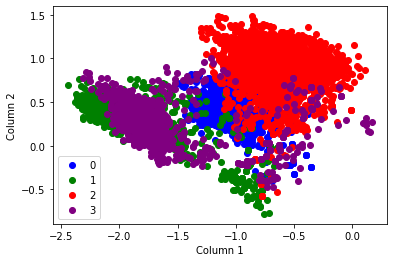

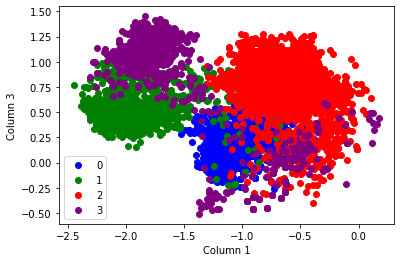

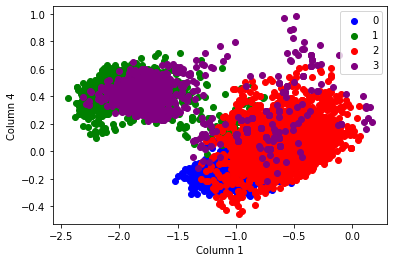

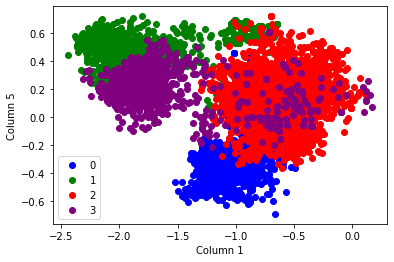

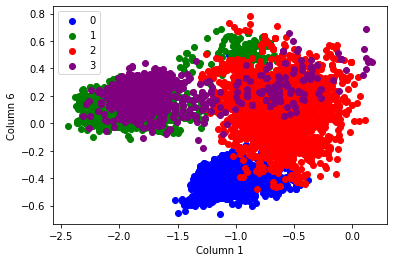

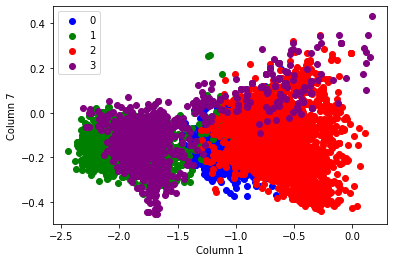

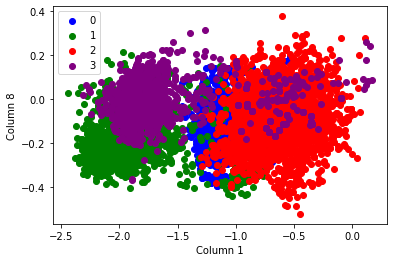

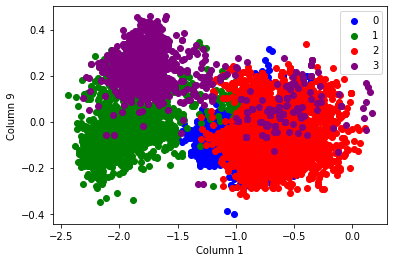

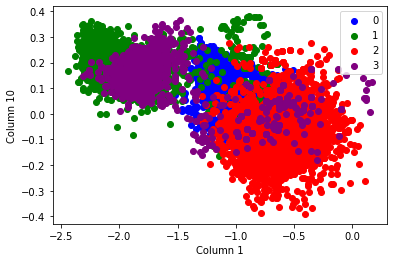

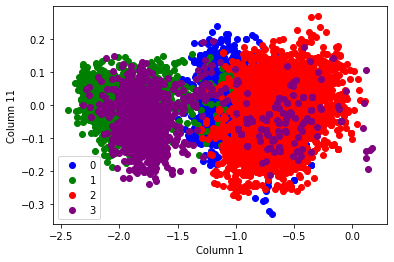

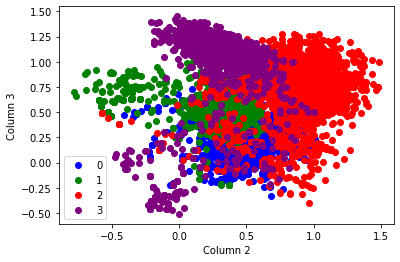

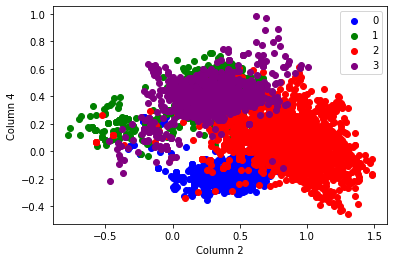

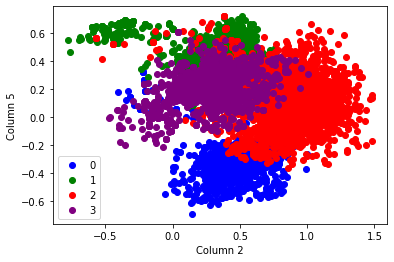

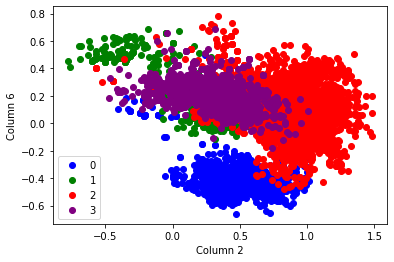

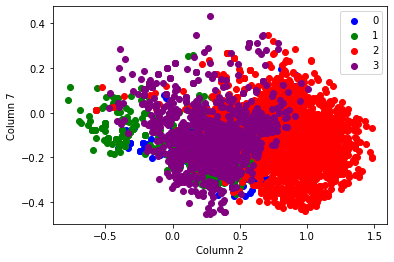

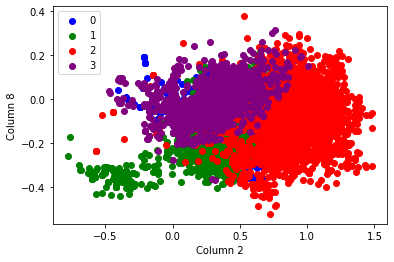

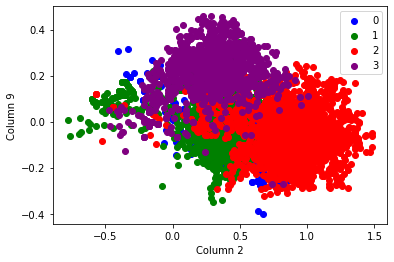

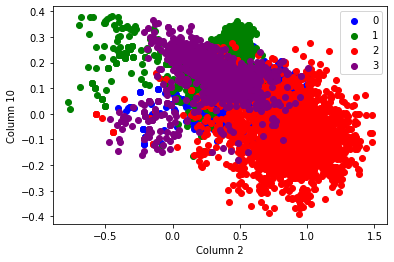

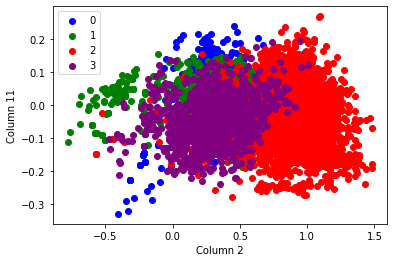

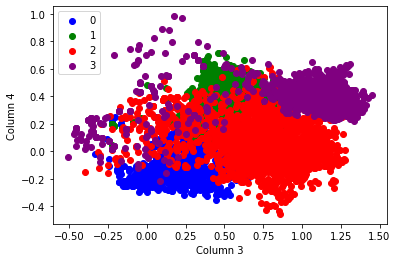

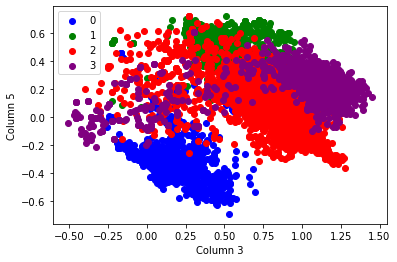

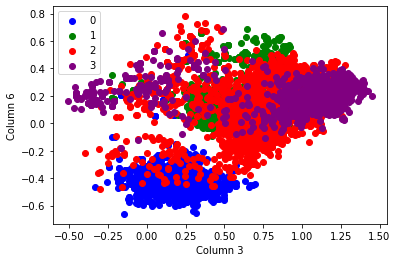

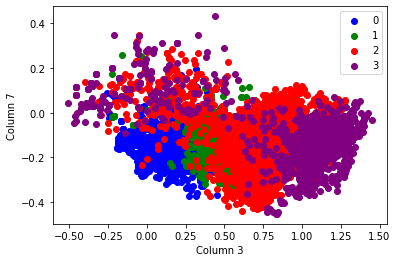

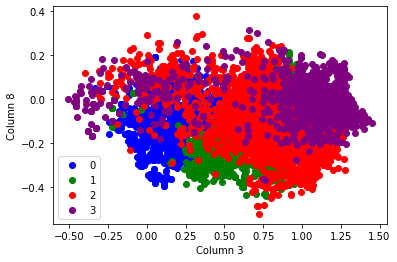

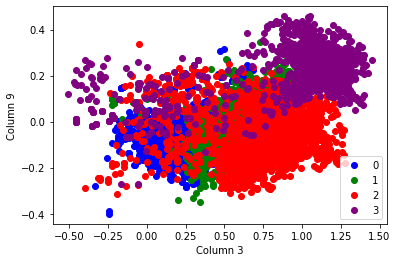

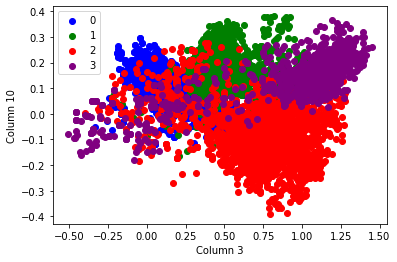

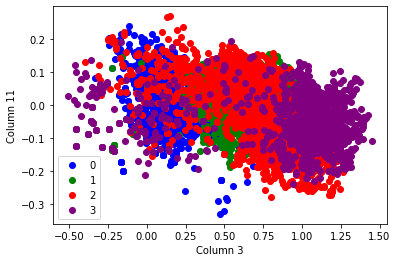

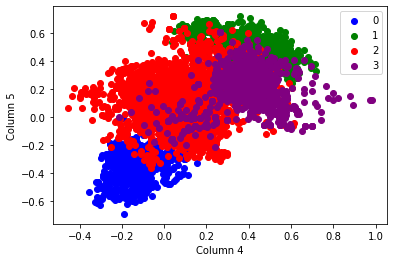

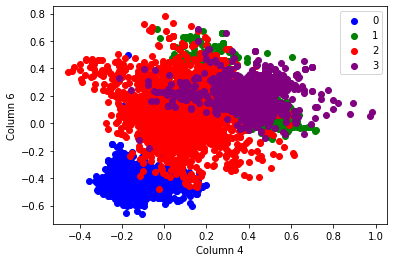

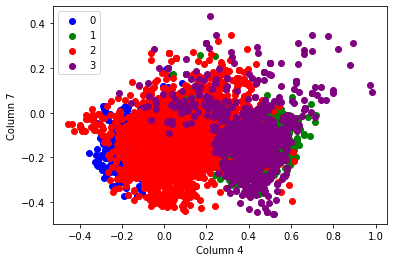

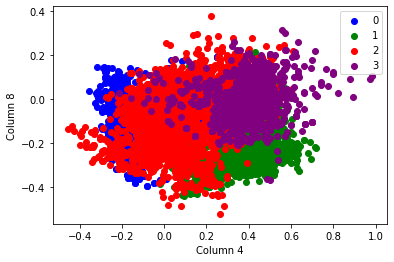

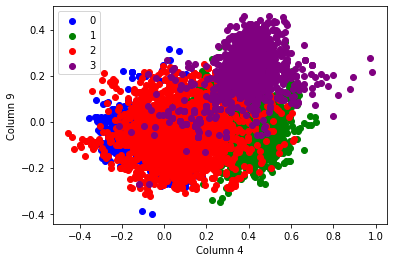

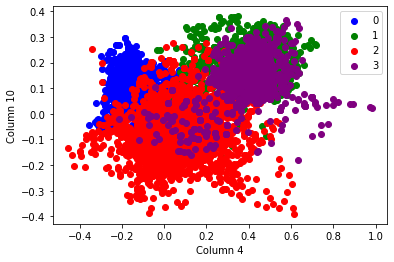

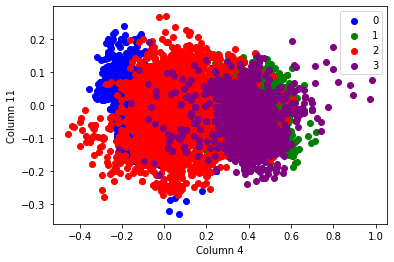

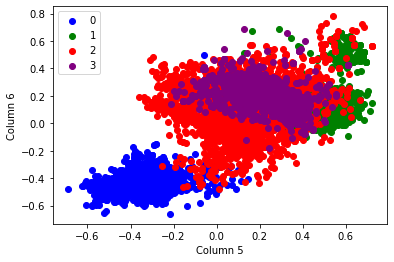

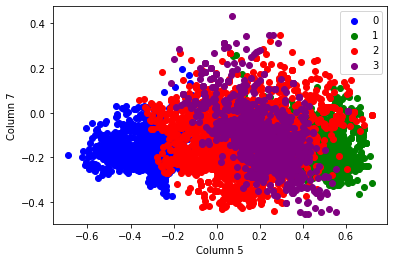

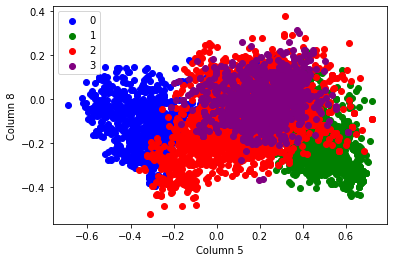

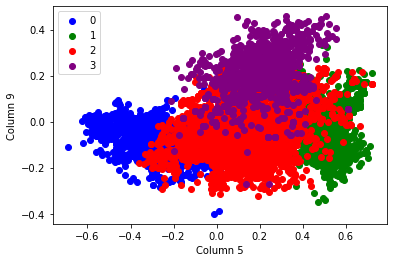

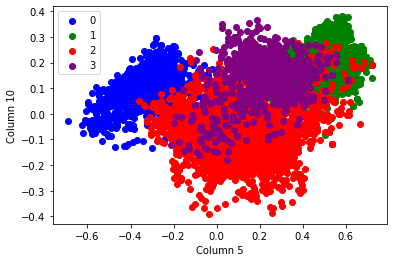

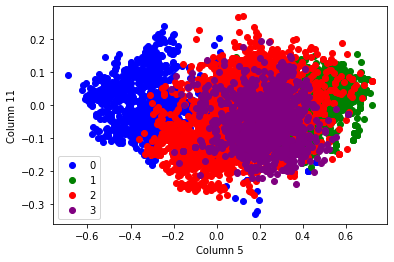

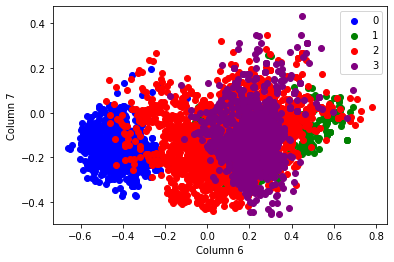

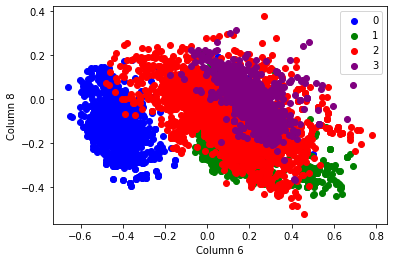

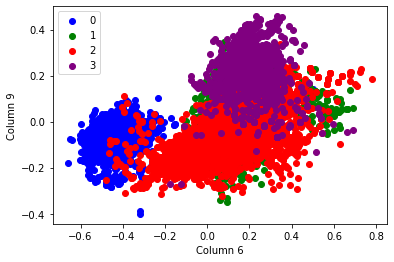

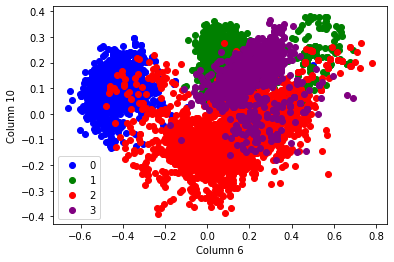

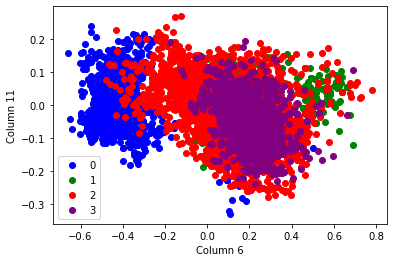

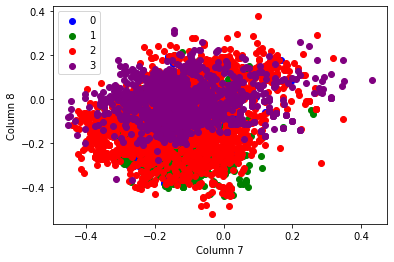

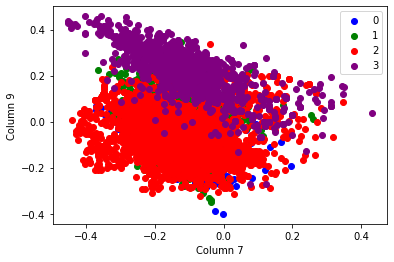

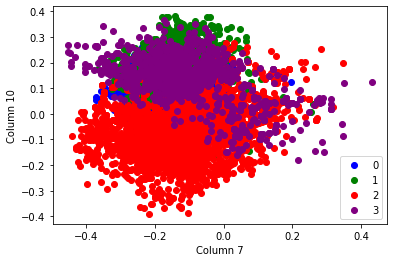

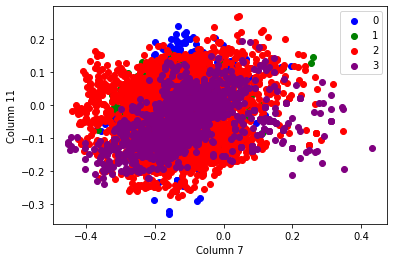

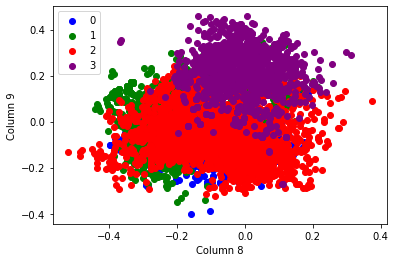

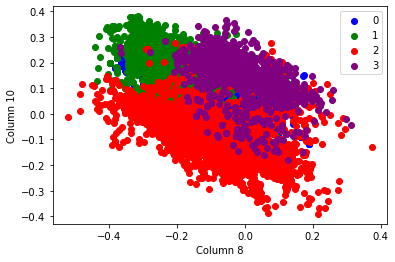

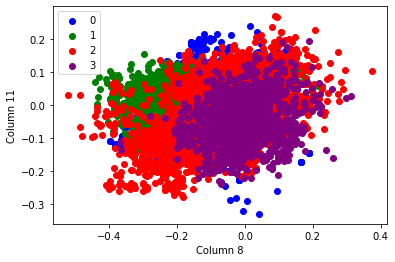

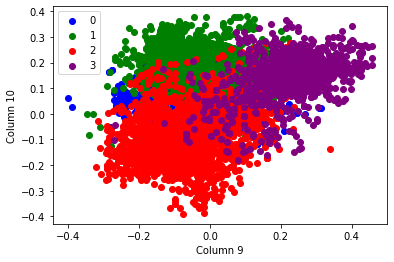

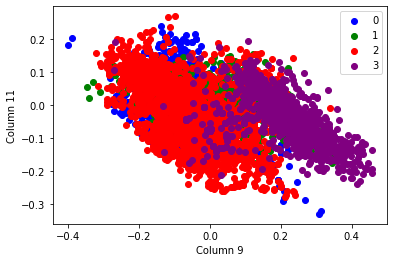

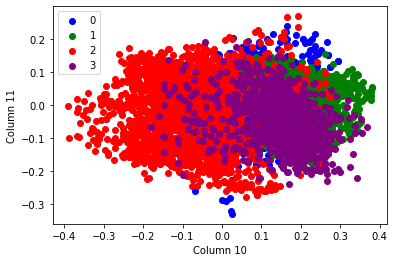

In [35]:
combinations = [(i, j) for i in range(series.shape[1]) for j in range(i+1, series.shape[1]) if i != 12 and j != 12]

# create a dictionary to map each value in the column to a color
color_map = {0: 'blue', 1: 'green', 2: 'red', 3: 'purple'}

# iterate over each combination of columns
for i, j in combinations:
    # extract the x and y values for this combination of columns
    x = series.iloc[:, i]
    y = series.iloc[:, j]

    # group the data by the column of interest and plot each group with a different color
    groups = series.groupby(series.iloc[:, 12])
    for name, group in groups:
        plt.scatter(group.iloc[:, i], group.iloc[:, j], color=color_map[name], label=name)

    # add axis labels and a legend to the plot
    plt.xlabel('Column {}'.format(i))
    plt.ylabel('Column {}'.format(j))
    plt.legend()
    fin_str='plots/LBG_plot'+str(i)+'_'+str(j)+'.jpeg'
    plt.savefig(fin_str, format='jpeg')
    # show the plot for this combination of columns
    plt.show()